# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [2]:
import sys

In [3]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn

  Using cached https://files.pythonhosted.org/packages/16/51/58b0b9de42fe1e665736d9286f88b5f1556a0e22bed8a71f468231761083/matplotlib-3.7.5-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/52/77/7e04cca2ff1dc6ee6b7654cebe233de72b7a3ec5616501b6f3144fb70740/kiwisolver-1.4.7-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/e5/0c/0e3c05b1c87bb6a1c76d281b0f35e78d2d80ac91b5f8f524cebf77f51049/pyparsing-3.1.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f2/75/3cb820b2812405fc7feb3d0deb701ef0c3de93dc02597115e00704591bc9/pillow-10.4.0-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/dc/7a/2b3666e8c13d035adf656a8ae391380656144760353c97f74747c64fd3e5/fonttools-4.57.0-cp38-cp38-win_amd64.whl
  Using cached https://files.py

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/81/c4/34e93fe5f5429d7570ec1fa436f1986fb1f00c3e0f43a589fe2bbcd22c3f/pytz-2025.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/23/c7abc0ca0a1526a0774eca151daeb8de62ec457e77262b66b359c3c7679e/tzdata-2025.2-py2.py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Using cached https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [7]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [18]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [20]:
if tf.config.list_physical_devices('GPU'):
    device = "GPU"
    print("Using GPU")
else:
    device = "CPU"
    print("Using CPU")

Using GPU


In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 116s 50ms/step - loss: 1.3170 - accuracy: 0.6087 - val_loss: 0.5042 - val_accuracy: 0.8424
Epoch 2/10
2197/2197 [==============================] - 107s 49ms/step - loss: 0.4286 - accuracy: 0.8631 - val_loss: 0.2815 - val_accuracy: 0.9109
Epoch 3/10
2197/2197 [==============================] - 105s 48ms/step - loss: 0.2638 - accuracy: 0.9149 - val_loss: 0.1928 - val_accuracy: 0.9353
Epoch 4/10
2197/2197 [==============================] - 105s 48ms/step - loss: 0.1802 - accuracy: 0.9408 - val_loss: 0.1673 - val_accuracy: 0.9458
Epoch 5/10
2197/2197 [==============================] - 107s 49ms/step - loss: 0.1312 - accuracy: 0.9571 - val_loss: 0.1158 - val_accuracy: 0.9624
Epoch 6/10
2197/2197 [==============================] - 107s 49ms/step - loss: 0.1077 - accuracy: 0.9647 - val_loss: 0.1663 - val_accuracy: 0.9484
Epoch 7/10
2197/2197 [==============================] - 107s 49ms/step - loss: 0.0809 - accuracy: 0.9733 - val_loss: 0

## Evaluating Model

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 32s 14ms/step - loss: 0.0276 - accuracy: 0.9906
Training accuracy: 0.9905967712402344


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 8s 14ms/step - loss: 0.1266 - accuracy: 0.9652
Validation accuracy: 0.965228796005249


### Saving Model

In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
training_history.history #Return Dictionary of history

{'loss': [1.3169690370559692,
  0.42860621213912964,
  0.2638016641139984,
  0.18023554980754852,
  0.13119052350521088,
  0.10769307613372803,
  0.08092980831861496,
  0.07474254071712494,
  0.060064636170864105,
  0.055344223976135254],
 'accuracy': [0.6086777448654175,
  0.8631339073181152,
  0.9149157404899597,
  0.9408350586891174,
  0.9571377635002136,
  0.9647343158721924,
  0.9732555747032166,
  0.9755032658576965,
  0.9805249571800232,
  0.9821893572807312],
 'val_loss': [0.5042311549186707,
  0.28150078654289246,
  0.19277876615524292,
  0.16729429364204407,
  0.1157568171620369,
  0.1663462072610855,
  0.13773901760578156,
  0.11120624840259552,
  0.13087314367294312,
  0.12662091851234436],
 'val_accuracy': [0.8424197435379028,
  0.9108809232711792,
  0.9352948069572449,
  0.9458228945732117,
  0.9623833298683167,
  0.9483838081359863,
  0.9603915214538574,
  0.9667084217071533,
  0.9624402523040771,
  0.965228796005249]}

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

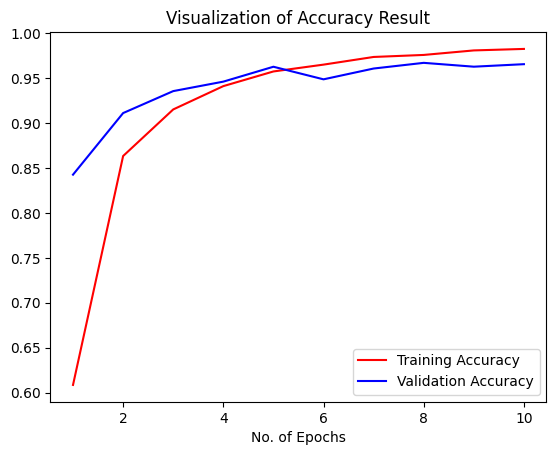

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 31s 2ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
!{sys.executable} -m pip install scikit-learn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [37]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.97       504
                                 Apple___Black_rot       1.00      0.99      0.99       497
                          Apple___Cedar_apple_rust       1.00      0.94      0.97       440
                                   Apple___healthy       0.98      0.95      0.97       502
                               Blueberry___healthy       0.94      1.00      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.97      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.89      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

### Confusion Matrix Visualization

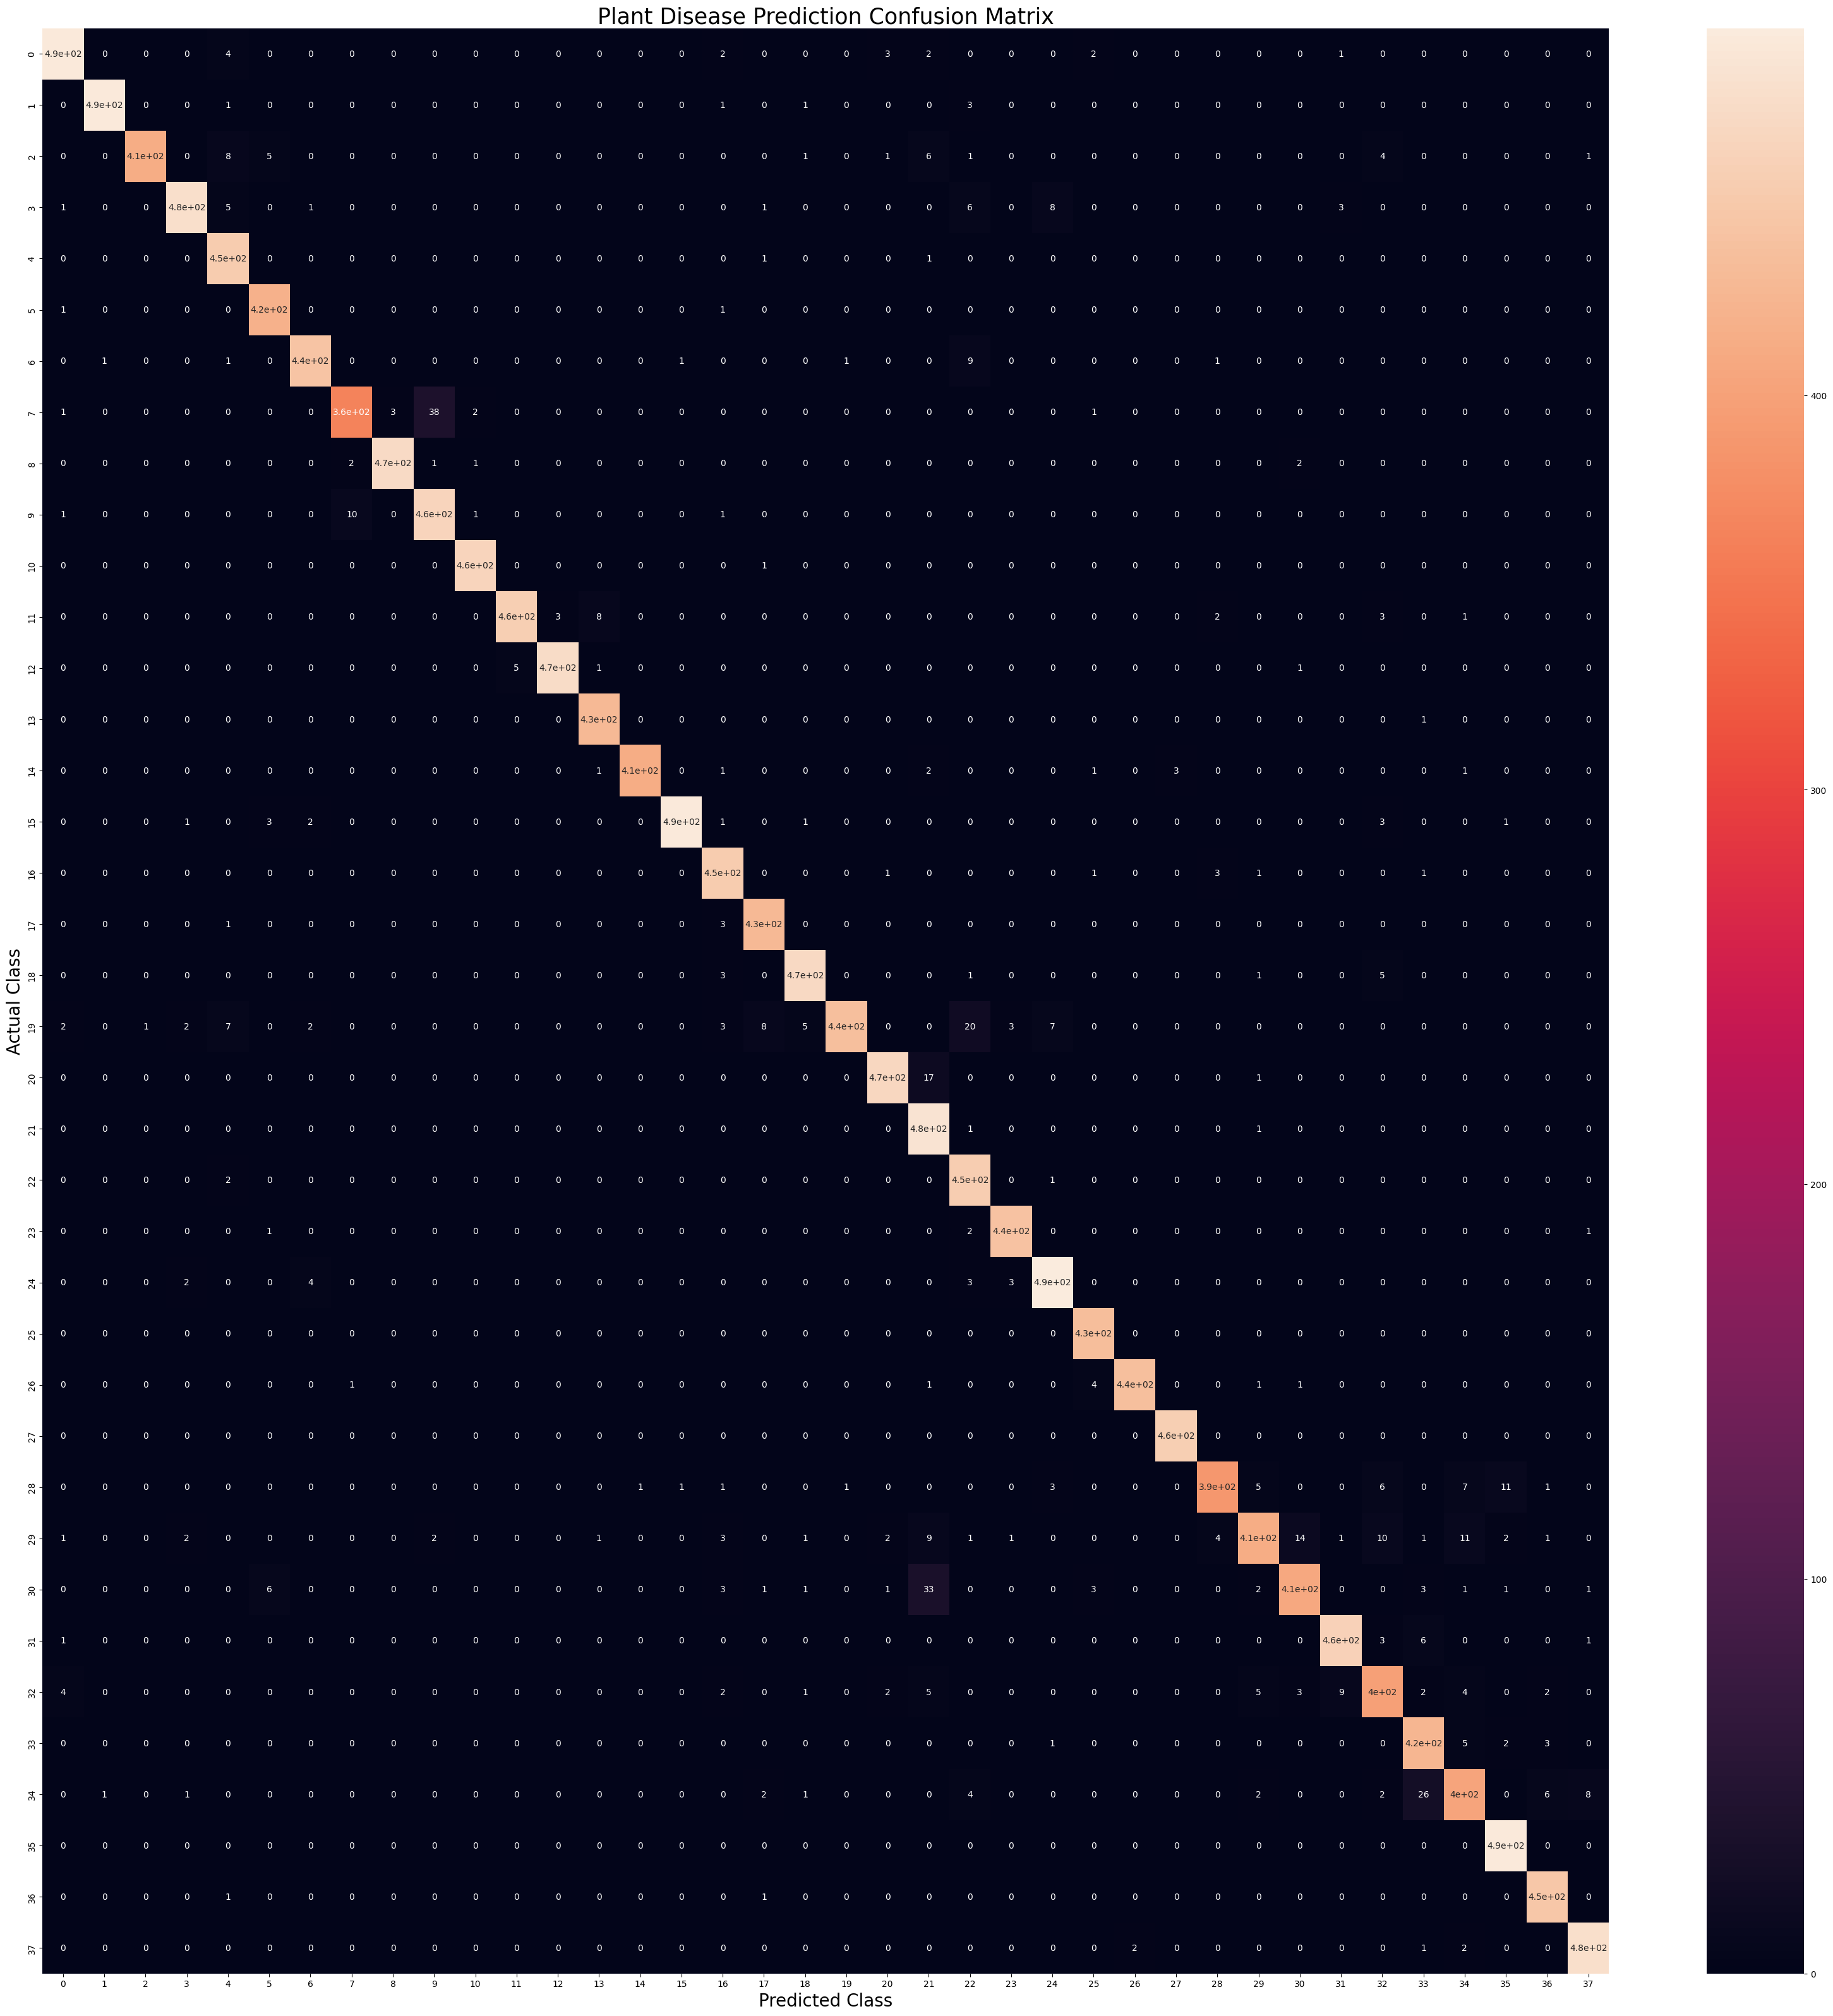

In [38]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()